# Filtering by T-SNE

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from tmap.tda import mapper, Filter
from tmap.tda.cover import Cover
from tmap.tda.plot import Color
from tmap.tda.metric import Metric
from tmap.tda.utils import optimize_dbscan_eps
from tmap.netx.SAFE import SAFE_batch, get_SAFE_summary
from tmap.test import load_data
from scipy.spatial.distance import squareform,pdist
import pandas as pd
import os

In [2]:
# load up you OTU data, metadata and a distance matrix
input_otu = pd.read_csv('table-with-taxonomy.tsv', sep='\t', header=0, index_col='#OTU ID')
X = input_otu.T
X.head()

metadata = pd.read_csv('16S_metadata_binary.tsv', sep='\t', header=0, index_col='Sample ID')
metadata.head()

dm = squareform(pdist(X,metric='braycurtis'))

Lets start using standard Euclidean distance

In [3]:
# create a simple TDA network using recommended parmeters and no precomputed distance metric

from tmap.tda import mapper, Filter
from tmap.tda.cover import Cover
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Step1. initiate a Mapper
tm = mapper.Mapper(verbose=1)

# Step2. Projection
lens = [Filter.TSNE(components=[0,1],random_state=100)]
projected_X = tm.filter(X, lens=lens)
eps = optimize_dbscan_eps(X, threshold=95)
clusterer = DBSCAN(eps=eps, min_samples=1)
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=20, overlap=0.75)

graph_simpleTSNE = tm.map(data=StandardScaler().fit_transform(X), cover=cover, clusterer=clusterer)

Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


100%|██████████| 400/400 [00:00<00:00, 5189.03it/s]

Filtering has been completed.
Mapping on data (116, 268) using lens (116, 2)
...minimal number of points in hypercube to do clustering: 1
...create 256 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.


...create 1264 edges.
Finish TDA mapping



Graph
Contains 256 nodes and 116 samples
During constructing graph, 0 (100.0%) samples lost

Used params:

cluster params
algorithm: auto
eps: 76041.84946073355
leaf_size: 30
metric: euclidean
metric_params: None
min_samples: 1
n_jobs: None
p: None
cover params
r: 20
overlap: 0.75
lens params
lens_0:
components: [0, 1]
metric: euclidean




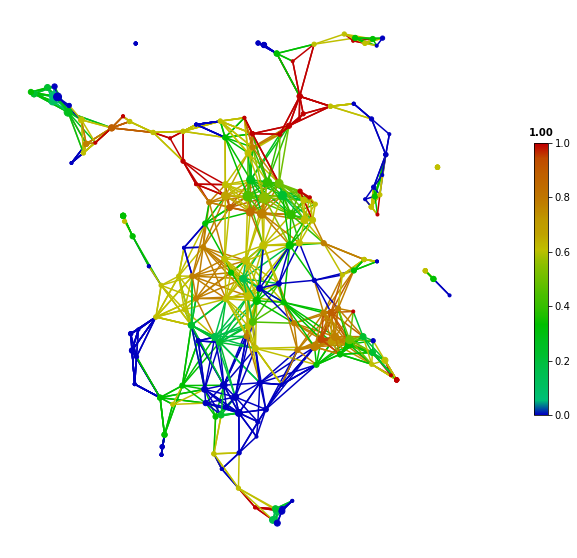

In [4]:
print(graph_simpleTSNE.info())

# Targeting the groups (CRC vs Control) in the visualisation
# 1 being CRC and 0 being Control

from tmap.tda.plot import Color
color = Color(metadata.loc[:,'Group'],target_by='sample',dtype='numerical')
graph_simpleTSNE.show(color=color)

Now let's repeat the steps above, this time using a Bray-Curtis distance matrix

In [5]:
# set up the distance matrix
dm = squareform(pdist(X,metric='braycurtis'))

# Step1. initiate a Mapper
tm = mapper.Mapper(verbose=1)

# Step2. Projection
metric = Metric(metric="precomputed")
lens = [Filter.TSNE(components=[0,1],metric=metric, random_state=100)]
projected_X = tm.filter(dm, lens=lens)
eps = optimize_dbscan_eps(X, threshold=95)
clusterer = DBSCAN(eps=eps, min_samples=1)
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=20, overlap=0.75)

graph_TSNE_BC = tm.map(data=StandardScaler().fit_transform(X), cover=cover, clusterer=clusterer)

Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided precomputed lens.


100%|██████████| 400/400 [00:00<00:00, 4401.77it/s]

Filtering has been completed.
Mapping on data (116, 268) using lens (116, 2)
...minimal number of points in hypercube to do clustering: 1
...create 276 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.


...create 1382 edges.
Finish TDA mapping



Graph
Contains 276 nodes and 116 samples
During constructing graph, 0 (100.0%) samples lost

Used params:

cluster params
algorithm: auto
eps: 76041.84946073355
leaf_size: 30
metric: euclidean
metric_params: None
min_samples: 1
n_jobs: None
p: None
cover params
r: 20
overlap: 0.75
lens params
lens_0:
components: [0, 1]
metric: precomputed




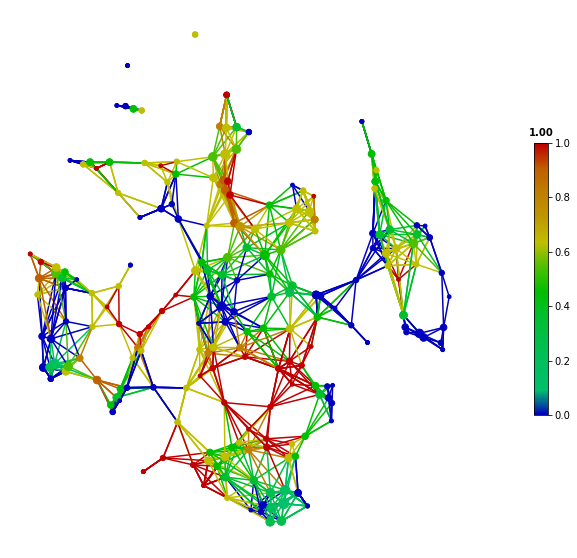

In [6]:
print(graph_TSNE_BC.info())

graph_TSNE_BC.show(color=color)

In [7]:
# TDA Step 1 - start Mapper
tm = mapper.Mapper(verbose=1)

# TDA Step 2 - projection of high-dimensional data to a lower dimension (using TSNE)
metric = Metric(metric="precomputed")
lens = [Filter.TSNE(components=[0, 1], metric=metric, random_state=100)]
projected_X = tm.filter(dm, lens=lens)

# Step 3 - covering, clustering & mapping
eps = optimize_dbscan_eps(X, threshold=95)
clusterer = DBSCAN(eps=eps, min_samples=3)
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=20, overlap=0.75)
graph_TSNE3 = tm.map(data=X, cover=cover, clusterer=clusterer)
print(graph_TSNE3.info())

Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided precomputed lens.


100%|██████████| 400/400 [00:00<00:00, 11643.89it/s]

Filtering has been completed.
Mapping on data (116, 268) using lens (116, 2)
...minimal number of points in hypercube to do clustering: 3
...create 117 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 468 edges.
Finish TDA mapping

Graph
Contains 117 nodes and 101 samples
During constructing graph, 15 (87.07000000000001%) samples lost

Used params:

cluster params
algorithm: auto
eps: 76041.84946073355
leaf_size: 30
metric: euclidean
metric_params: None
min_samples: 3
n_jobs: None
p: None
cover params
r: 20
overlap: 0.75
lens params
lens_0:
components: [0, 1]
metric: precomputed




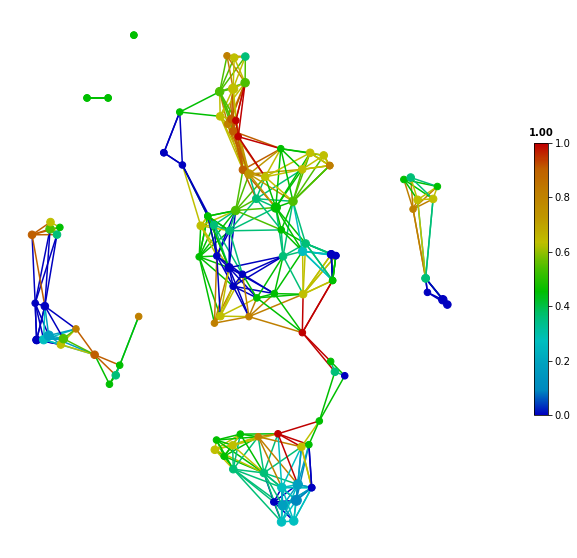

In [8]:
graph_TSNE3.show(color=color)